{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.7:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736041500, '100'], [1736041510, '100'], [1736041520, '100'], [1736041530, '100'], [1736041540, '100'], [1736041550, '100'], [1736041560, '1'], [1736041570, '1'], [1736041580, '1'], [1736041590, '2'], [1736041600, '2'], [1736041610, '2'], [1736041620, '4'], [1736041630, '4'], [1736041640, '4'], [1736041650, '8'], [1736041660, '8'], [1736041670, '8'], [1736041680, '16'], [1736041690, '16'], [1736041700, '16'], [1736041710, '32'], [1736041720, '32'], [1736041730, '32'], [1736041740, '64'], [1736041750, '64'], [1736041760, '64'], [1736041770, '100'], [1736041780, '100'], [1736041790, '100'], [173604180

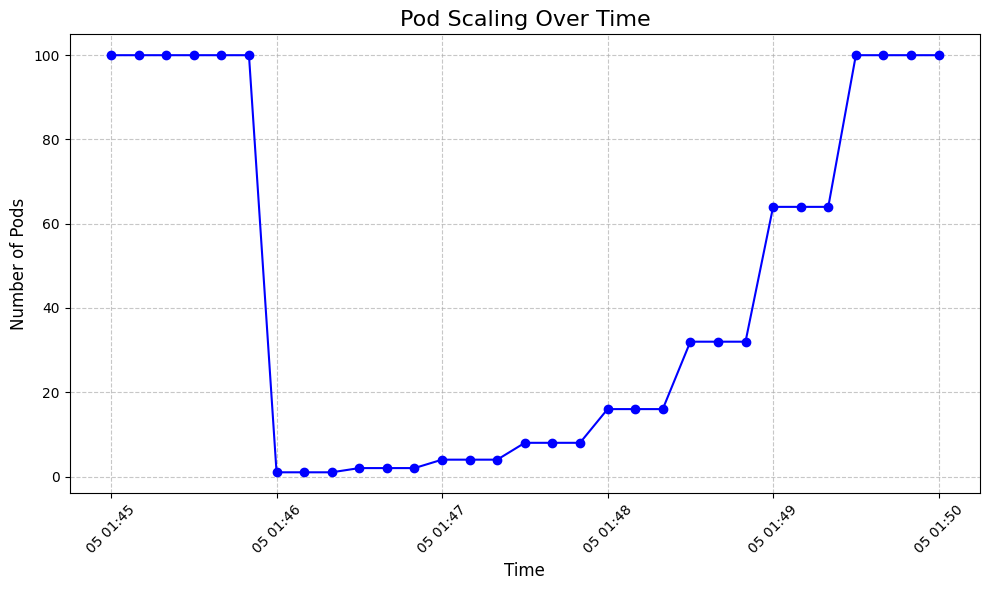

In [74]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T01:45:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T01:50:00Z",    # End time in ISO8601 format
    "step": "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of Pods", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)
prom